In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

In [2]:
global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_torch",
                      "difficulty" : "standard",
                      "num_tasks" : 5,
                      "train_percentage" : 0.8,
                      "num_val_benchmarks" : 5,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "Naive baseline",
                   "grow_from" : "output",
                   "hessian_percentile" : 95,
                   "grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 100,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 5,
                "lr" : (5e-5, 2e-3),
                "num_epochs" : (2, 6)}
                #"ewc_lambda" : (200,1000)}
                #"lwf_alpha" : None, #(0.1, 0.9),
                #"lwf_temperature" : None} #(1, 3)

# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True,
                          "visualize_violin" : True}

In [3]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [4]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation

In [5]:
device = get_device(1)

## Get benchmarks

In [6]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [7]:
test_accs_matrix, best_params_list, model = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-10 14:31:37,644] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1


100%|██████████| 4/4 [00:21<00:00,  5.26s/it]
[I 2024-07-10 14:32:00,024] Trial 0 finished with value: 95.9179569892473 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 95.9179569892473.
100%|██████████| 6/6 [00:32<00:00,  5.36s/it]
[I 2024-07-10 14:32:33,455] Trial 1 finished with value: 96.26268817204301 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 1 with value: 96.26268817204301.
100%|██████████| 5/5 [00:26<00:00,  5.24s/it]
[I 2024-07-10 14:33:00,903] Trial 2 finished with value: 96.16172043010752 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 1 with value: 96.26268817204301.
100%|██████████| 3/3 [00:15<00:00,  5.24s/it]
[I 2024-07-10 14:33:17,855] Trial 3 finished with value: 95.50612903225806 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 1 with value: 96.26268817204301.
100%|██████████| 4/4 [00:20<00:00,  5.23s/it]
[I 2024-07-10 14:33:40,035] T

Number of frozen neurons : 0.0
Number of trainable neurons : 100


100%|██████████| 6/6 [00:31<00:00,  5.25s/it]
[I 2024-07-10 14:34:16,931] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2


100%|██████████| 4/4 [00:21<00:00,  5.44s/it]
[I 2024-07-10 14:34:41,176] Trial 0 finished with value: 94.57774193548389 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 94.57774193548389.
100%|██████████| 6/6 [00:31<00:00,  5.30s/it]
[I 2024-07-10 14:35:15,509] Trial 1 finished with value: 94.48532258064515 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 0 with value: 94.57774193548389.
100%|██████████| 5/5 [00:26<00:00,  5.27s/it]
[I 2024-07-10 14:35:44,359] Trial 2 finished with value: 94.16607526881718 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 0 with value: 94.57774193548389.
100%|██████████| 3/3 [00:15<00:00,  5.29s/it]
[I 2024-07-10 14:36:02,708] Trial 3 finished with value: 94.65736559139789 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 3 with value: 94.65736559139789.
100%|██████████| 4/4 [00:21<00:00,  5.28s/it]
[I 2024-07-10 14:36:26,341]

Number of frozen neurons : 100
Number of trainable neurons : 100


100%|██████████| 4/4 [00:21<00:00,  5.29s/it]
[I 2024-07-10 14:36:52,750] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3


100%|██████████| 4/4 [00:21<00:00,  5.33s/it]
[I 2024-07-10 14:37:17,831] Trial 0 finished with value: 88.50555555555555 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 88.50555555555555.
100%|██████████| 6/6 [00:31<00:00,  5.33s/it]
[I 2024-07-10 14:37:53,579] Trial 1 finished with value: 88.17261648745522 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 0 with value: 88.50555555555555.
100%|██████████| 5/5 [00:26<00:00,  5.33s/it]
[I 2024-07-10 14:38:23,985] Trial 2 finished with value: 86.93741935483871 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 0 with value: 88.50555555555555.
100%|██████████| 3/3 [00:16<00:00,  5.34s/it]
[I 2024-07-10 14:38:43,771] Trial 3 finished with value: 89.3119713261649 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 3 with value: 89.3119713261649.
100%|██████████| 4/4 [00:21<00:00,  5.34s/it]
[I 2024-07-10 14:39:08,908] T

Number of frozen neurons : 200
Number of trainable neurons : 100


100%|██████████| 4/4 [00:21<00:00,  5.33s/it]
[I 2024-07-10 14:39:35,488] A new study created in memory with name: Search number 4



--------------------------------------------------
LEARNING TASK 4


100%|██████████| 4/4 [00:21<00:00,  5.37s/it]
[I 2024-07-10 14:40:02,018] Trial 0 finished with value: 85.27629032258064 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 85.27629032258064.
100%|██████████| 6/6 [00:32<00:00,  5.35s/it]
[I 2024-07-10 14:40:39,162] Trial 1 finished with value: 84.23470430107528 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 0 with value: 85.27629032258064.
100%|██████████| 5/5 [00:26<00:00,  5.35s/it]
[I 2024-07-10 14:41:10,957] Trial 2 finished with value: 83.29376344086022 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 0 with value: 85.27629032258064.
100%|██████████| 3/3 [00:16<00:00,  5.35s/it]
[I 2024-07-10 14:41:32,044] Trial 3 finished with value: 86.10341397849464 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 3 with value: 86.10341397849464.
100%|██████████| 4/4 [00:21<00:00,  5.35s/it]
[I 2024-07-10 14:41:58,493]

Number of frozen neurons : 300
Number of trainable neurons : 100


100%|██████████| 4/4 [00:21<00:00,  5.34s/it]
[I 2024-07-10 14:42:25,135] A new study created in memory with name: Search number 5



--------------------------------------------------
LEARNING TASK 5


100%|██████████| 4/4 [00:21<00:00,  5.40s/it]
[I 2024-07-10 14:42:53,057] Trial 0 finished with value: 84.13827956989246 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 4}. Best is trial 0 with value: 84.13827956989246.
100%|██████████| 6/6 [00:32<00:00,  5.40s/it]
[I 2024-07-10 14:43:31,834] Trial 1 finished with value: 82.89686021505378 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 6}. Best is trial 0 with value: 84.13827956989246.
100%|██████████| 5/5 [00:27<00:00,  5.40s/it]
[I 2024-07-10 14:44:05,212] Trial 2 finished with value: 82.35746236559139 and parameters: {'lr': 0.0014149828218016016, 'num_epochs': 5}. Best is trial 0 with value: 84.13827956989246.
100%|██████████| 3/3 [00:16<00:00,  5.41s/it]
[I 2024-07-10 14:44:27,792] Trial 3 finished with value: 84.8756989247312 and parameters: {'lr': 0.0014488098450782315, 'num_epochs': 3}. Best is trial 3 with value: 84.8756989247312.
100%|██████████| 4/4 [00:21<00:00,  5.41s/it]
[I 2024-07-10 14:44:55,790] T

Number of frozen neurons : 400
Number of trainable neurons : 100


100%|██████████| 4/4 [00:21<00:00,  5.40s/it]


## Visualize results

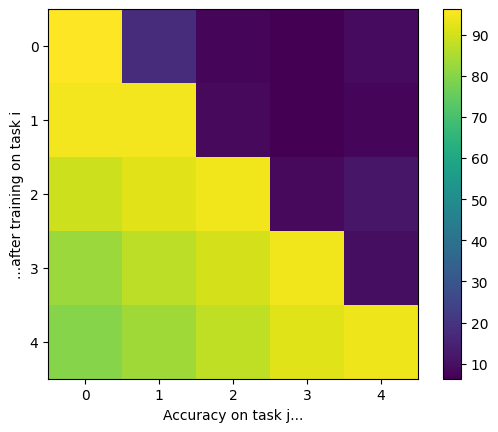

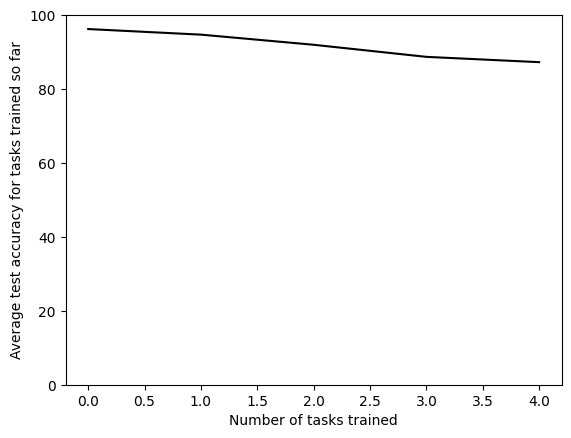

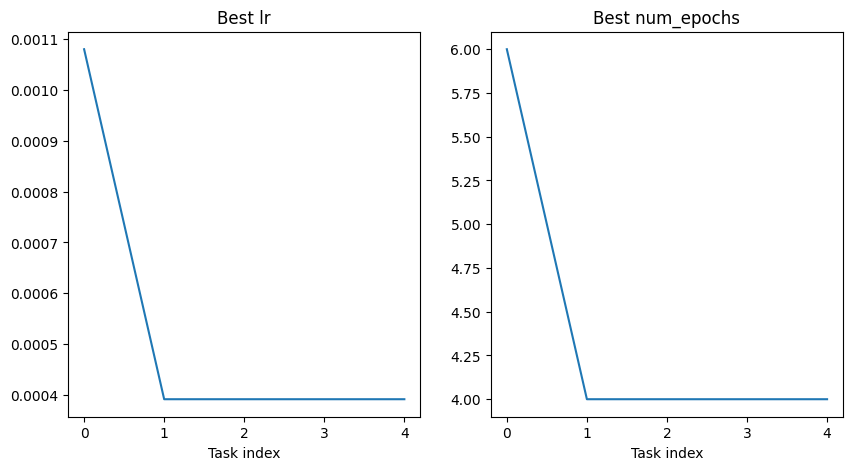

In [8]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [9]:
val_accs_matrix = validate(benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 0

--------------------------------------------------
LEARNING TASK 1
Number of frozen neurons : 0.0
Number of trainable neurons : 100


100%|██████████| 6/6 [00:32<00:00,  5.37s/it]



--------------------------------------------------
LEARNING TASK 2
Number of frozen neurons : 100
Number of trainable neurons : 100


100%|██████████| 4/4 [00:21<00:00,  5.44s/it]



--------------------------------------------------
LEARNING TASK 3
Number of frozen neurons : 200
Number of trainable neurons : 100


100%|██████████| 4/4 [00:21<00:00,  5.48s/it]



--------------------------------------------------
LEARNING TASK 4
Number of frozen neurons : 300
Number of trainable neurons : 100


100%|██████████| 4/4 [00:22<00:00,  5.53s/it]



--------------------------------------------------
LEARNING TASK 5
Number of frozen neurons : 400
Number of trainable neurons : 100


100%|██████████| 4/4 [00:22<00:00,  5.59s/it]



BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1
Number of frozen neurons : 0.0
Number of trainable neurons : 100


100%|██████████| 6/6 [00:32<00:00,  5.38s/it]



--------------------------------------------------
LEARNING TASK 2
Number of frozen neurons : 100
Number of trainable neurons : 100


100%|██████████| 4/4 [00:21<00:00,  5.43s/it]



--------------------------------------------------
LEARNING TASK 3
Number of frozen neurons : 200
Number of trainable neurons : 100


100%|██████████| 4/4 [00:21<00:00,  5.50s/it]



--------------------------------------------------
LEARNING TASK 4
Number of frozen neurons : 300
Number of trainable neurons : 100


100%|██████████| 4/4 [00:22<00:00,  5.54s/it]



--------------------------------------------------
LEARNING TASK 5
Number of frozen neurons : 400
Number of trainable neurons : 100


100%|██████████| 4/4 [00:22<00:00,  5.55s/it]



BENCHMARK 2

--------------------------------------------------
LEARNING TASK 1
Number of frozen neurons : 0.0
Number of trainable neurons : 100


100%|██████████| 6/6 [00:31<00:00,  5.26s/it]



--------------------------------------------------
LEARNING TASK 2
Number of frozen neurons : 100
Number of trainable neurons : 100


100%|██████████| 4/4 [00:21<00:00,  5.30s/it]



--------------------------------------------------
LEARNING TASK 3
Number of frozen neurons : 200
Number of trainable neurons : 100


100%|██████████| 4/4 [00:21<00:00,  5.34s/it]



--------------------------------------------------
LEARNING TASK 4
Number of frozen neurons : 300
Number of trainable neurons : 100


100%|██████████| 4/4 [00:21<00:00,  5.39s/it]



--------------------------------------------------
LEARNING TASK 5
Number of frozen neurons : 400
Number of trainable neurons : 100


100%|██████████| 4/4 [00:21<00:00,  5.40s/it]



BENCHMARK 3

--------------------------------------------------
LEARNING TASK 1
Number of frozen neurons : 0.0
Number of trainable neurons : 100


100%|██████████| 6/6 [00:31<00:00,  5.24s/it]



--------------------------------------------------
LEARNING TASK 2
Number of frozen neurons : 100
Number of trainable neurons : 100


100%|██████████| 4/4 [00:21<00:00,  5.28s/it]



--------------------------------------------------
LEARNING TASK 3
Number of frozen neurons : 200
Number of trainable neurons : 100


100%|██████████| 4/4 [00:21<00:00,  5.33s/it]



--------------------------------------------------
LEARNING TASK 4
Number of frozen neurons : 300
Number of trainable neurons : 100


100%|██████████| 4/4 [00:21<00:00,  5.36s/it]



--------------------------------------------------
LEARNING TASK 5
Number of frozen neurons : 400
Number of trainable neurons : 100


100%|██████████| 4/4 [00:21<00:00,  5.40s/it]



BENCHMARK 4

--------------------------------------------------
LEARNING TASK 1
Number of frozen neurons : 0.0
Number of trainable neurons : 100


100%|██████████| 6/6 [00:31<00:00,  5.25s/it]



--------------------------------------------------
LEARNING TASK 2
Number of frozen neurons : 100
Number of trainable neurons : 100


100%|██████████| 4/4 [00:21<00:00,  5.33s/it]



--------------------------------------------------
LEARNING TASK 3
Number of frozen neurons : 200
Number of trainable neurons : 100


100%|██████████| 4/4 [00:21<00:00,  5.48s/it]



--------------------------------------------------
LEARNING TASK 4
Number of frozen neurons : 300
Number of trainable neurons : 100


100%|██████████| 4/4 [00:22<00:00,  5.54s/it]



--------------------------------------------------
LEARNING TASK 5
Number of frozen neurons : 400
Number of trainable neurons : 100


100%|██████████| 4/4 [00:22<00:00,  5.58s/it]



BENCHMARK 5

--------------------------------------------------
LEARNING TASK 1
Number of frozen neurons : 0.0
Number of trainable neurons : 100


100%|██████████| 6/6 [00:32<00:00,  5.39s/it]



--------------------------------------------------
LEARNING TASK 2
Number of frozen neurons : 100
Number of trainable neurons : 100


100%|██████████| 4/4 [00:22<00:00,  5.63s/it]



--------------------------------------------------
LEARNING TASK 3
Number of frozen neurons : 200
Number of trainable neurons : 100


100%|██████████| 4/4 [00:22<00:00,  5.72s/it]



--------------------------------------------------
LEARNING TASK 4
Number of frozen neurons : 300
Number of trainable neurons : 100


100%|██████████| 4/4 [00:23<00:00,  5.79s/it]



--------------------------------------------------
LEARNING TASK 5
Number of frozen neurons : 400
Number of trainable neurons : 100


100%|██████████| 4/4 [00:23<00:00,  5.81s/it]


## Visualize validation

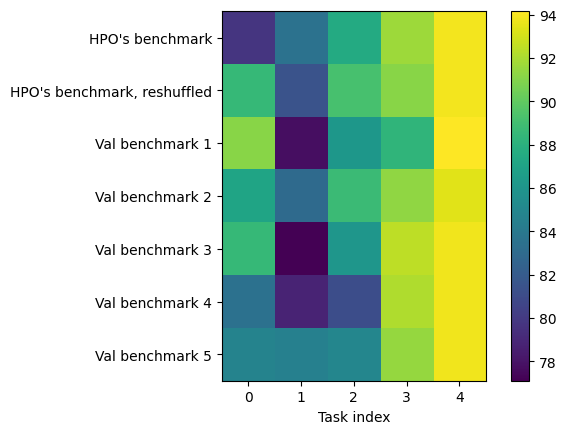

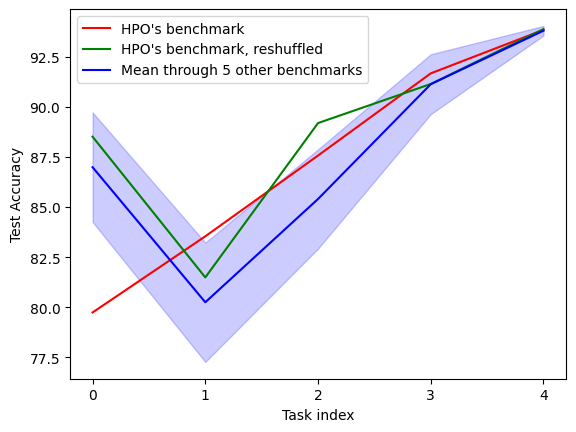

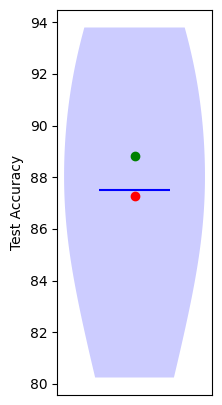

In [10]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [11]:
if save_results :
    np.savetxt('Results/test_accs_matrix.csv', test_accs_matrix)
    np.savetxt('Results/val_accs_matrix.csv', val_accs_matrix)